In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv('dataSet.csv');

In [6]:
print(data)

   hours  pass
0      1     0
1      3     0
2      5     1
3      7     1


In [7]:
x = data[['hours']]
y = data[['pass']]

In [22]:
model = LogisticRegression()
model.fit(x,y)

E:\Anaconda ML software\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
x_new = pd.DataFrame({'hours': [5,10]})
predictions = model.predict(x_new)
probabilities = model.predict_proba(x_new)[:, 1]


In [18]:
print(f"Prediction for 5 hours: {'Pass' if predictions[0] == 1 else 'Fail'} (Prob: {probabilities[0]:.4f})")
print(f"Prediction for 10 hours: {'Pass' if predictions[1] == 1 else 'Fail'} (Prob: {probabilities[1]:.4f})")

Prediction for 5 hours: Pass (Prob: 0.7156)
Prediction for 10 hours: Pass (Prob: 0.9961)


In [20]:
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
y_range_prob = model.predict_proba(x_range)[:, 1]

E:\Anaconda ML software\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


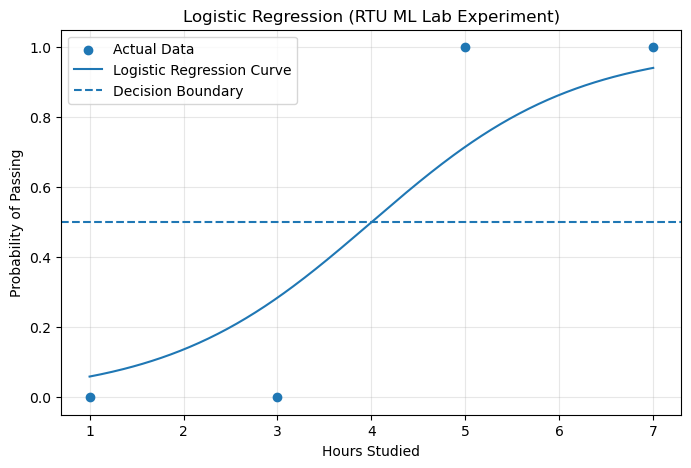

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Data", zorder=5)
plt.plot(x_range, y_range_prob, label="Logistic Regression Curve")
plt.axhline(0.5, linestyle="--", label="Decision Boundary")

plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression (RTU ML Lab Experiment)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()